In [1]:
'''

This code is part of the SIPN2 project focused on improving sub-seasonal to seasonal predictions of Arctic Sea Ice. 
If you use this code for a publication or presentation, please cite the reference in the README.md on the
main page (https://github.com/NicWayand/ESIO). 

Questions or comments should be addressed to nicway@uw.edu

Copyright (c) 2018 Nic Wayand

GNU General Public License v3.0


'''
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import numpy.ma as ma
import pandas as pd
import os
import xarray as xr
import glob
# import loadobservations as lo
from esio import import_data
from esio import metrics
from esio import EsioData as ed
from esio import ice_plot
import datetime
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

# Dirs
E = ed.EsioData.load()
data_dir = E.obs_dir

# Flags
UpdateAll = True

# Products to import
product_list = ['iceBridgeQuickLook']

In [2]:
# Loop through each product
for c_product in product_list:
    print('Importing ', c_product, '...')
    start_pt = 0 # Starting index

    # Find new files that haven't been imported yet
    native_dir = os.path.join(data_dir, c_product, 'native')
    os.chdir(native_dir)
    
    native_files = sorted(glob.glob('*.txt'))
    nc_dir = os.path.join(data_dir, c_product, 'sipn_nc')

    os.chdir(nc_dir)
    nc_files = sorted(glob.glob('*.nc'))
    
    if UpdateAll:
        new_files = [x.split('.txt')[0] for x in native_files]
        print('Updating all ', len(native_files), ' files...')
    else:
        new_files = np.setdiff1d([os.path.basename(x).split('.txt')[0] for x in native_files], 
                                 [x.split('.nc')[0] for x in nc_files]) # just get file name and compare
        print('Found ', len(new_files), ' new files to import...')

    # Loop through each file
    for nf in new_files:
        print(nf)
        
        # Load in 
        ds = import_data.load_1_iceBridgeQL(filein=os.path.join(native_dir, nf+'.txt'), start_pt=start_pt)
        
        # Save last point value
        start_pt = ds.point.values[-1]
        
        # Save to netcdf file
        ds.to_netcdf(os.path.join(nc_dir, nf+'.nc'))
        ds = None
    
    # For each Product
    print("Finished ", c_product)
    print("")

Importing  iceBridgeQuickLook ...
Updating all  74  files...
IDCSI4_20160419
IDCSI4_20160420


/home/disk/sipn/nicway/anaconda3/envs/esio/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2850: DtypeWarning: Columns (31) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


IDCSI4_20160421
IDCSI4_20160429
IDCSI4_20160503
IDCSI4_20160504
IDCSI4_20170309
IDCSI4_20170310


/home/disk/sipn/nicway/anaconda3/envs/esio/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2850: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


IDCSI4_20170311
IDCSI4_20170312
IDCSI4_20170314
IDCSI4_20170320
IDCSI4_20170323
IDCSI4_20170324
IDCSI4_20170403
IDCSI4_20170405
IDCSI4_20170406
IDCSI4_20170407
IDCSI4_20170411
IDCSI4_20170419
IDCSI4_20180322
IDCSI4_20180403
IDCSI4_20180404
IDCSI4_20180406
IDCSI4_20180407
IDCSI4_20180408
IDCSI4_20180414
IDCSI4_20180416
OIB_20120314_IDCSI2_ql
OIB_20120315_IDCSI2_ql
OIB_20120316_IDCSI2_ql
OIB_20120317_IDCSI2_ql
OIB_20120319_IDCSI2_ql
OIB_20120321_IDCSI2_ql
OIB_20120322_IDCSI2_ql
OIB_20120323_IDCSI2_ql
OIB_20120326_IDCSI2_ql
OIB_20120327_IDCSI2_ql
OIB_20120328_IDCSI2_ql
OIB_20120329_IDCSI2_ql
OIB_20120402_IDCSI2_ql
OIB_20130321_IDCSI2_ql
OIB_20130322_IDCSI2_ql
OIB_20130323_IDCSI2_ql
OIB_20130324_IDCSI2_ql
OIB_20130326_IDCSI2_ql
OIB_20130327_IDCSI2_ql
OIB_20130422_IDCSI2_ql
OIB_20130424_IDCSI2_ql
OIB_20130425_IDCSI2_ql
OIB_20140312_IDCSI2
OIB_20140313_IDCSI2
OIB_20140314_IDCSI2
OIB_20140315_IDCSI2
OIB_20140317_IDCSI2
OIB_20140318_IDCSI2
OIB_20140319_IDCSI2
OIB_20140321_IDCSI2
OIB_20140324_I

/home/disk/sipn/nicway/anaconda3/envs/esio/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2850: DtypeWarning: Columns (34) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


OIB_20150329_IDCSI2
OIB_20150330_IDCSI2
OIB_20150401_IDCSI2
OIB_20150403_IDCSI2
Finished  iceBridgeQuickLook



In [3]:
## Test plots below

In [17]:
ds_all = xr.open_mfdataset(nc_dir+'/*.nc', concat_dim='point')

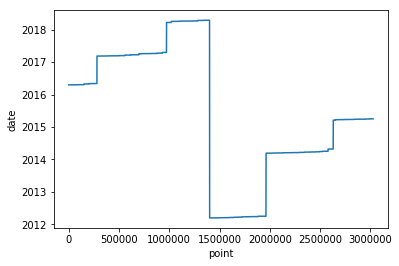

In [5]:
# Due to file name change, point is not in time order
ds_all.date.plot()

In [7]:
ds_all.hi.mean().values

array(2.55566661)

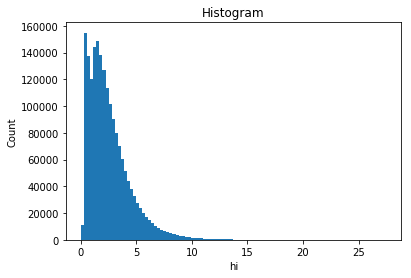

In [8]:
ds_all.hi.plot.hist(bins=100);

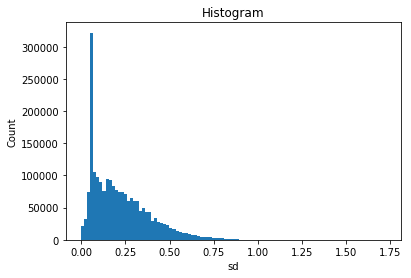

In [9]:
ds_all.sd.plot.hist(bins=100);

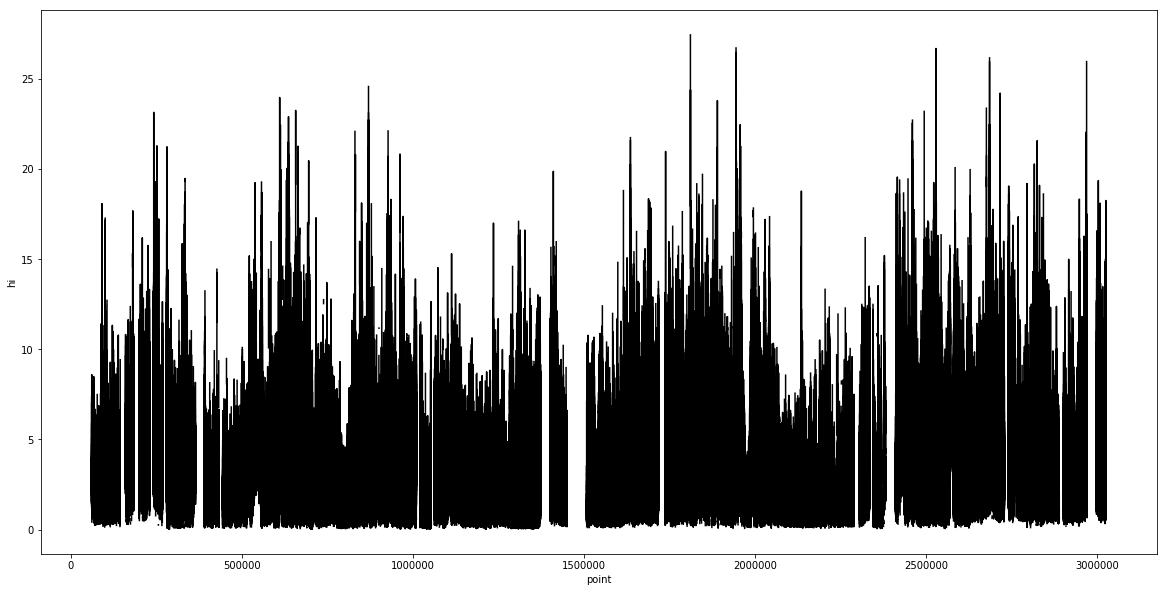

In [10]:
plt.figure(figsize=(20,10))
ds_all.hi.plot(color='k')

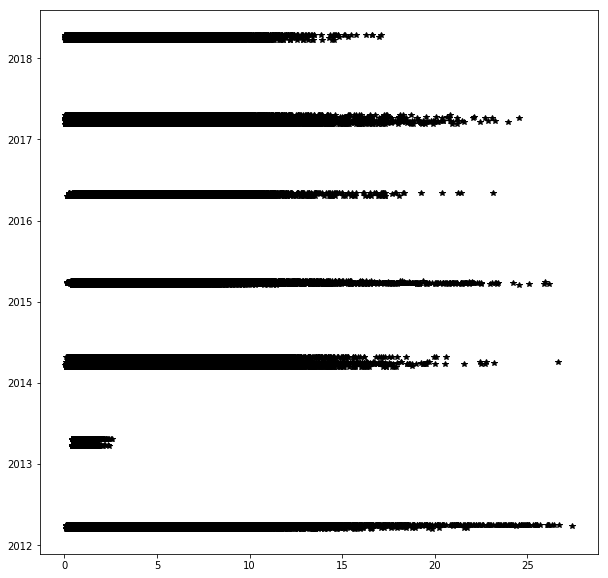

In [11]:
plt.figure(figsize=(10,10))
plt.plot(ds_all.hi.values, ds_all.date,'k*')

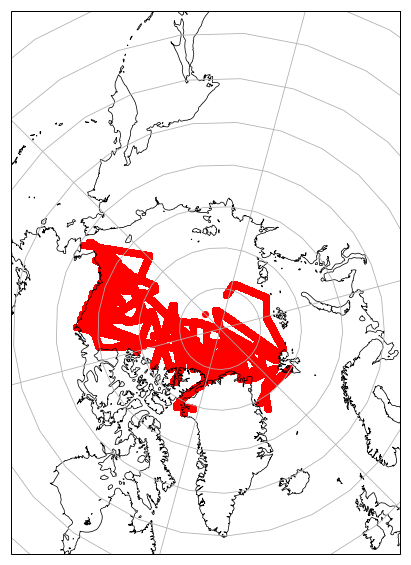

In [12]:
(f, ax) = ice_plot.polar_axis()
f.set_size_inches(20,10)
plt.scatter(ds_all.lon.values, ds_all.lat.values, transform=ccrs.PlateCarree(), c='r', marker='o')